In [1]:
!pip install pandas semopy numpy matplotlib


In [2]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv('cps_00006.csv')


In [4]:
policy = pd.read_csv('Policy Milestones - State.csv')
policy

,statefips,statename,date,policy_description,schools_first_closed,nonessential_biz_first_closed,stayathome_first_start
0,1,Alabama,2020-03-19,Alabama public schools closed,1,0,0
1,1,Alabama,2020-03-28,Alabama ordered closed all non-essential busin...,0,1,0
2,1,Alabama,2020-04-03,Alabama issued stay at home order,0,0,1
3,1,Alabama,2020-04-30,Alabama ended stay at home order statewide,0,0,0
4,1,Alabama,2020-05-01,Alabama reopened select businesses statewide,0,0,0
...,...,...,...,...,...,...,...
667,56,Wyoming,2020-07-01,"Wyoming permitted in-person child care, K-12, ...",0,0,0
668,56,Wyoming,2021-02-25,Wyoming loosened restrictions on gatherings an...,0,0,0
669,56,Wyoming,2021-03-15,Wyoming eliminated restrictions on restaurants...,0,0,0
670,56,Wyoming,2021-06-19,Wyoming ended emergency employment benefits: T...,0,0,0


In [5]:
policy = policy[policy['statename'] != 'District of Columbia']
employment = 'emergency employment'
states_with_policy = policy.loc[policy['policy_description'].str.contains(employment, case=False)].drop_duplicates()
s=states_with_policy['statename']

all_states = policy[['statefips']].drop_duplicates()
all_states['ended_employment_benefits']= all_states['statefips'].isin(states_with_policy['statefips'])
#all_states['party'] = all_states['statefips'].map(state_party)

#converting false/true to yes/no
all_states['ended_employment_benefits'] = all_states['ended_employment_benefits'].map({True: 1, False: 0})
all_states
policy['ended_early']=all_states['ended_employment_benefits']
yes_fips = policy.loc[policy['ended_early'] == 1, 'statefips']


C:\Users\cynth\AppData\Local\Temp\ipykernel_15956\1596972076.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  policy['ended_early']=all_states['ended_employment_benefits']


In [6]:
df

,YEAR,SERIAL,MONTH,HWTFINL,CPSID,ASECFLAG,STATEFIP,COUNTY,PERNUM,WTFINL,...,AGE,SEX,RACE,HISPAN,EMPSTAT,OCC,IND,DURUNEMP,EDUC,LNKFW1MWT
0,2018,1,1,1490.5890,20161000000100,NaN,1,0,1,2158.9491,...,71,1,100,0,32,0,0,999,92,0.0000
1,2018,1,1,1490.5890,20161000000100,NaN,1,0,2,1490.5890,...,64,2,100,0,36,0,0,999,81,0.0000
2,2018,2,1,1609.4899,20161200000200,NaN,1,0,1,1420.7457,...,72,1,100,0,10,9140,7580,999,81,1449.8373
3,2018,2,1,1609.4899,20161200000200,NaN,1,0,2,1609.4899,...,73,2,100,0,36,0,0,999,81,1611.1885
4,2018,3,1,1797.0408,20180100000300,NaN,1,0,1,2053.2749,...,66,1,100,0,10,4920,7070,999,111,2095.3184
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5457775,2021,68411,12,366.9949,20211206841100,NaN,56,0,2,0.0000,...,23,1,200,0,1,0,0,999,73,0.0000
5457776,2021,68412,12,283.0656,20201206893000,NaN,56,0,1,283.0656,...,43,2,100,0,10,5940,8380,999,111,292.9807
5457777,2021,68412,12,283.0656,20201206893000,NaN,56,0,2,250.0166,...,10,1,100,0,0,0,0,999,1,279.3742
5457778,2021,68412,12,283.0656,20201206893000,NaN,56,0,3,273.2533,...,11,2,100,0,0,0,0,999,1,317.8838


In [7]:
# List of states that ended policy early
ended_policy_fips = [1,
 2,
 4,
 5,
 12,
 13,
 16,
 18,
 19,
 22,
 24,
 28,
 29,
 30,
 31,
 38,
 39,
 40,
 46,
 47,
 48,
 49,
 54,
 56]

# Create a new binary column: 1 if state ended policy early, else 0
df['ended_policy_early'] = df['STATEFIP'].apply(lambda x: 1 if x in ended_policy_fips else 0)


In [8]:
import pandas as pd

# Columns you actually need
cols = [
    'YEAR', 'MONTH', 'STATEFIP', 'EMPSTAT', 'OCC', 'IND', 'AGE','DURUNEMP','CPSID', 'EDUC'

]


chunksize = 100000
filtered_chunks = []

for chunk in pd.read_csv('cps_00006.csv', usecols=cols, chunksize=chunksize, low_memory=False):
    # Filter for 2021 and May–Oct (5–10)
    mask = (chunk['YEAR'] == 2021) & (chunk['MONTH'].between(6, 9))
    filtered_chunks.append(chunk.loc[mask])

# Combine filtered chunks
df_2021 = pd.concat(filtered_chunks, ignore_index=True)
print(df_2021.shape)


(422029, 10)


In [9]:
df_2021

,YEAR,MONTH,CPSID,STATEFIP,AGE,EMPSTAT,OCC,IND,DURUNEMP,EDUC
0,2021,6,20200300001100,1,80,36,0,0,999,111
1,2021,6,20200300001100,1,80,36,0,0,999,92
2,2021,6,20210600000500,1,44,32,0,0,999,40
3,2021,6,20210400000900,1,38,10,6260,770,999,40
4,2021,6,20200300001300,1,45,10,7750,3580,999,73
...,...,...,...,...,...,...,...,...,...,...
422024,2021,9,20200706863600,56,24,10,440,770,999,73
422025,2021,9,20200706863600,56,24,10,5120,6170,999,92
422026,2021,9,20200706863600,56,0,0,0,0,999,1
422027,2021,9,20200706863600,56,3,0,0,0,999,1


In [10]:
ended_policy_fips = [1,
 2,
 4,
 5,
 12,
 13,
 16,
 18,
 19,
 22,
 24,
 28,
 29,
 30,
 31,
 38,
 39,
 40,
 46,
 47,
 48,
 49,
 54,
 56]

# Create a new binary column: 1 if state ended policy early, else 0
df_2021['ended_policy_early'] = df_2021['STATEFIP'].apply(lambda x: 1 if x in ended_policy_fips else 0)
df_2021


,YEAR,MONTH,CPSID,STATEFIP,AGE,EMPSTAT,OCC,IND,DURUNEMP,EDUC,ended_policy_early
0,2021,6,20200300001100,1,80,36,0,0,999,111,1
1,2021,6,20200300001100,1,80,36,0,0,999,92,1
2,2021,6,20210600000500,1,44,32,0,0,999,40,1
3,2021,6,20210400000900,1,38,10,6260,770,999,40,1
4,2021,6,20200300001300,1,45,10,7750,3580,999,73,1
...,...,...,...,...,...,...,...,...,...,...,...
422024,2021,9,20200706863600,56,24,10,440,770,999,73,1
422025,2021,9,20200706863600,56,24,10,5120,6170,999,92,1
422026,2021,9,20200706863600,56,0,0,0,0,999,1,1
422027,2021,9,20200706863600,56,3,0,0,0,999,1,1


In [11]:
df_2021 = df_2021[df_2021['AGE'] >= 15]

In [12]:
df_2021['EMPSTAT'].value_counts()

10    186369
36     76719
34     46209
32     17145
12      9889
21      9585
1       1415
22       767
Name: EMPSTAT, dtype: int64

In [13]:
df_2021['OCC'].value_counts()

0       140015
440       7360
9130      4866
3255      4434
2310      4284
         ...  
425          9
8940         9
7030         5
5040         4
8910         3
Name: OCC, Length: 527, dtype: int64

In [14]:
df_2021['IND'].value_counts()

0       140015
770      15476
8680     12108
7860     11749
8191      9992
         ...  
1670        20
1790        19
1470        14
2090        13
1390        12
Name: IND, Length: 264, dtype: int64

In [15]:
df_2021['DURUNEMP'].value_counts()

999    337753
52       1074
2         830
4         812
8         655
        ...  
80          1
96          1
58          1
100         1
95          1
Name: DURUNEMP, Length: 96, dtype: int64

In [16]:
df.columns.tolist()

['YEAR',
 'SERIAL',
 'MONTH',
 'HWTFINL',
 'CPSID',
 'ASECFLAG',
 'STATEFIP',
 'COUNTY',
 'PERNUM',
 'WTFINL',
 'CPSIDP',
 'CPSIDV',
 'AGE',
 'SEX',
 'RACE',
 'HISPAN',
 'EMPSTAT',
 'OCC',
 'IND',
 'DURUNEMP',
 'EDUC',
 'LNKFW1MWT',
 'ended_policy_early']

In [17]:
df_2021[df_2021['EMPSTAT'] == 1]

,YEAR,MONTH,CPSID,STATEFIP,AGE,EMPSTAT,OCC,IND,DURUNEMP,EDUC,ended_policy_early
373,2021,6,20200400029900,1,39,1,0,0,999,92,1
1038,2021,6,20210500061300,1,51,1,0,0,999,125,1
1045,2021,6,20200300066000,1,23,1,0,0,999,73,1
1046,2021,6,20200300066000,1,29,1,0,0,999,111,1
1143,2021,6,20200600069000,1,28,1,0,0,999,73,1
...,...,...,...,...,...,...,...,...,...,...,...
421739,2021,9,20200706842800,56,35,1,0,0,999,81,1
421794,2021,9,20201006862700,56,27,1,0,0,999,111,1
421862,2021,9,20210606776700,56,25,1,0,0,999,81,1
421957,2021,9,20210706771600,56,35,1,0,0,999,111,1


In [18]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Standardize data
scaler = StandardScaler()
df_2021=pd.DataFrame(scaler.fit_transform(df_2021), columns=df_2021.columns)

In [19]:
model_desc = """
# Regressions
EMPSTAT ~ AGE + DURUNEMP + ended_policy_early + MONTH + OCC + IND
DURUNEMP ~ AGE + ended_policy_early + OCC + IND + MONTH


# Variances
AGE ~~ AGE
DURUNEMP ~~ DURUNEMP
EMPSTAT ~~ EMPSTAT
"""

In [20]:
from semopy import Model
path = Model(model_desc)
path.fit(df_2021)

SolverResult(fun=3.3394408283093924e-07, success=True, n_it=16, x=array([ 1.04544673e-01, -1.22706047e-01, -6.94835155e-04,  4.28927893e-04,
       -3.57061278e-01, -6.06672187e-01,  4.98206423e-02,  2.86219403e-02,
       -9.36715064e-02, -3.91789638e-02,  1.90782206e-02,  1.00000000e+00,
        9.79625836e-01,  2.49415974e-01]), message='Optimization terminated successfully', name_method='SLSQP', name_obj='MLW')

In [21]:
path.inspect()

,lval,op,rval,Estimate,Std. Err,z-value,p-value
0,DURUNEMP,~,AGE,0.049821,0.001769,28.158618,0.000000
1,DURUNEMP,~,ended_policy_early,0.028622,0.001680,17.040423,0.000000
2,DURUNEMP,~,OCC,-0.093672,0.001917,-48.855773,0.000000
3,DURUNEMP,~,IND,-0.039179,0.001931,-20.294412,0.000000
4,DURUNEMP,~,MONTH,0.019078,0.001678,11.372488,0.000000
5,EMPSTAT,~,AGE,0.104545,0.000894,116.970903,0.000000
6,EMPSTAT,~,DURUNEMP,-0.122706,0.000855,-143.477800,0.000000
7,EMPSTAT,~,ended_policy_early,-0.000695,0.000848,-0.819502,0.412500
8,EMPSTAT,~,MONTH,0.000429,0.000847,0.506628,0.612416
9,EMPSTAT,~,OCC,-0.357061,0.000971,-367.819912,0.000000


In [22]:
!pip install graphviz
import graphviz
print(graphviz.__version__)

0.21


In [23]:
import os

# Add Graphviz bin folder to PATH
os.environ["PATH"] += os.pathsep + r"C:\Program Files\Graphviz\bin"

# Verify
!dot -V


dot - graphviz version 14.0.2 (20251019.1705)


In [24]:
from semopy import semplot


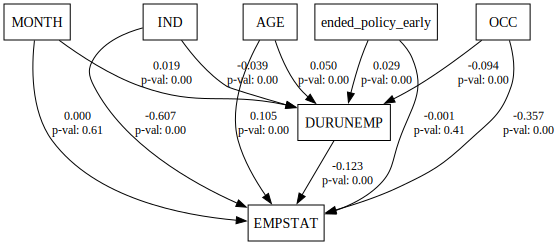

In [25]:
from semopy import Optimizer, calc_stats, semplot
from IPython.display import Image
semplot(path, 'path_diagram.png')

In [26]:
import graphviz
import subprocess

# Check Python package
try:
    print("Graphviz Python package version:", graphviz.__version__)
except Exception as e:
    print("Python package error:", e)

# Check Graphviz executable
try:
    result = subprocess.run(['dot', '-V'], capture_output=True, text=True)
    print("Graphviz executable:", result.stdout.strip() or result.stderr.strip())
except FileNotFoundError:
    print("Graphviz executable not found. Make sure the bin folder is in your PATH.")


Graphviz Python package version: 0.21
Graphviz executable: dot - graphviz version 14.0.2 (20251019.1705)


In [27]:
df_2021

,YEAR,MONTH,CPSID,STATEFIP,AGE,EMPSTAT,OCC,IND,DURUNEMP,EDUC,ended_policy_early
0,0.0,-1.338194,-1.116405,-1.666543,1.635257,1.294057,-0.841179,-1.009504,0.174932,0.987427,1.056023
1,0.0,-1.338194,-1.116405,-1.666543,1.635257,1.294057,-0.841179,-1.009504,0.174932,0.210589,1.056023
2,0.0,-1.338194,0.945849,-1.666543,-0.226463,0.963322,-0.841179,-1.009504,0.174932,-1.915495,1.056023
3,0.0,-1.338194,0.905805,-1.666543,-0.536749,-0.855723,1.326229,-0.802516,0.174932,-1.915495,1.056023
4,0.0,-1.338194,-1.116405,-1.666543,-0.174748,-0.855723,1.842114,-0.047145,0.174932,-0.566249,1.056023
...,...,...,...,...,...,...,...,...,...,...,...
348093,0.0,1.351753,1.007270,1.721672,-0.588464,-0.855723,0.619917,1.103384,0.174932,-0.648022,1.056023
348094,0.0,1.351753,0.987247,1.721672,0.238967,-0.855723,0.117882,1.434026,0.174932,-0.566249,1.056023
348095,0.0,1.351753,0.987247,1.721672,0.290682,-0.855723,2.498222,0.439679,0.174932,-0.566249,1.056023
348096,0.0,1.351753,-1.034943,1.721672,-1.260752,-0.855723,-0.688837,-0.802516,0.174932,-0.566249,1.056023


In [28]:
df_2021['ended_policy_early'].value_counts()

-0.946949    183527
 1.056023    164571
Name: ended_policy_early, dtype: int64